In [1]:
library(ggplot2)
library(grid)
library(data.table)
library(Rmisc)
library(dplyr)
library(broom)

Loading required package: lattice
Loading required package: plyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

In [3]:
## DATA FROM JOHNSON ET AL. 2018 PROC B

#Load in dataset containing only my cities
setwd("/Users/jamessantangelo/Desktop")
Johnson_et_al_data <- read.csv("20_Cities_Johnson-et-al.csv")

#Run model testing for change in HCN frequency with standardized distance across matrix. 
#Performed separately for each city
Johnson_lm <- Johnson_et_al_data %>%
    group_by(city) %>%
    do(FitCityCyan = lm(cy ~ std_dist, data = .))

#Create data frame with results from linear models of Cyan
Johnson_lmSummary = tidy(Johnson_lm, FitCityCyan)

#Subset linear models to only include slopes and p-values
Johnson_lmSummary_filtered <- Johnson_lmSummary %>%
    filter(term == "std_dist") %>%
    select(estimate, p.value) %>%
    mutate(dataset = "Johnson_et_al", sig = ifelse(p.value < 0.05, "Yes", "No"), category = "observed") %>%
    rename(cline = city)


head(Johnson_lmSummary_filtered)

Adding missing grouping variables: `city`


cline,estimate,p.value,dataset,sig,category
Acton,0.02380528,0.8281912,Johnson_et_al,No,observed
Angus,0.02113005,0.8858719,Johnson_et_al,No,observed
Barrie,0.08500176,0.3330125,Johnson_et_al,No,observed
Bradford,-0.01125574,0.8875485,Johnson_et_al,No,observed
Brantford,0.09540613,0.3219262,Johnson_et_al,No,observed
Cobourg,-0.01218471,0.9060116,Johnson_et_al,No,observed


In [4]:
# DATA FROM THOMPSON ET AL. 2016 PROC B

setwd("/Users/jamessantangelo/Documents/Academia/Doctorate_PhD/Projects/UAC_Urban-adaptive-clines-in-white-clover/UAC_Misc/Ken's data and R script/CSV's")
Thompson_et_al_data <- read.csv("2016-02-17-UAC-NatPop_Data.csv", header = T)

Thompson_et_al_data$cline_id <- with(Thompson_et_al_data, paste(City, Transect, sep=""))

#Run model testing for change in HCN frequency with standardized distance across matrix. 
#Performed separately for each city
Thompson_lm <- Thompson_et_al_data %>%
    group_by(cline_id) %>%
    mutate(range = max(DistToCore) - min(DistToCore), 
           Distance_std = ((DistToCore - min(DistToCore)) / range)) %>%
    do(FitCityCyan = lm(PropCyanogenic ~ Distance_std, data = .))

#Create data frame with results from linear models of Cyan
Thompson_lmSummary = tidy(Thompson_lm, FitCityCyan)

#Subset linear models to only include slopes and p-values
Thompson_lmSummary_filtered <- Thompson_lmSummary %>%
    filter(term == "Distance_std") %>%
    select(estimate, p.value) %>%
    mutate(dataset = "Thompson_et_al", sig = ifelse(p.value < 0.05, "Yes", "No"), category = "observed") %>%
    rename(cline = cline_id)

head(Thompson_lmSummary_filtered)

Adding missing grouping variables: `cline_id`


cline,estimate,p.value,dataset,sig,category
B,0.11918070,4.948444e-02,Thompson_et_al,Yes,observed
M,-0.05694601,5.698033e-01,Thompson_et_al,No,observed
TA,0.26689588,5.327848e-03,Thompson_et_al,Yes,observed
TB,0.29324156,3.609068e-06,Thompson_et_al,Yes,observed
TC,0.29536563,7.970367e-03,Thompson_et_al,Yes,observed
Y,0.14541022,1.181334e-02,Thompson_et_al,Yes,observed


In [5]:
# DATA FROM SIMULATIONS IN SANTANGELO ET AL. 2018 PROC B

#Working directory for datasets varying migration rate and bottleneck proportion
setwd('/Users/jamessantangelo/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary/allFill_Kvary_KminVary/')

# Dataset with strong drif gradient. No migration
Santangelo_et_al_data <- fread('20180111_StdSlopes_allFill_Kvary_KminVary.csv', header = T)
Santangelo_et_al_data$min_K <- as.factor(as.character(Santangelo_et_al_data$min_K))
Santangelo_et_al_data$Mig_rate <- as.factor(as.character(Santangelo_et_al_data$Mig_rate))

# Data subsets
Santangelo_et_al_data_Gen250 <- Santangelo_et_al_data %>%
    group_by(Mig_rate, min_K) %>%
    filter(Generation == 250) %>%
    select(estimate, p.value, Sim) %>%
    mutate(dataset = "Santangelo_et_al", sig = ifelse(p.value < 0.05, "Yes", "No"), category = "simulated") %>%
    rename(cline = Sim)
    
head(Santangelo_et_al_data_Gen250)

Read 6000000 rows and 6 (of 6) columns from 0.294 GB file in 00:00:04


Adding missing grouping variables: `Mig_rate`, `min_K`


Mig_rate,min_K,estimate,p.value,cline,dataset,sig,category
0,10,0.2231012,0.2292696389,0,Santangelo_et_al,No,simulated
0,10,0.2719317,0.1484729630,1,Santangelo_et_al,No,simulated
0,10,0.3550134,0.0692841445,2,Santangelo_et_al,No,simulated
0,10,0.2229366,0.2428665980,3,Santangelo_et_al,No,simulated
0,10,0.6443305,0.0002500184,4,Santangelo_et_al,Yes,simulated
0,10,0.3950451,0.0347552903,5,Santangelo_et_al,Yes,simulated


In [6]:
Santangelo_et_al_data_Gen250_Kmin10_NoMig <- subset(Santangelo_et_al_data_Gen250, min_K == "10" & Mig_rate == "0")
Santangelo_et_al_data_Gen250_Kmin100_NoMig <- subset(Santangelo_et_al_data_Gen250, min_K == "100" & Mig_rate == "0")
Santangelo_et_al_data_Gen250_Kmin500_NoMig <- subset(Santangelo_et_al_data_Gen250, min_K == "500" & Mig_rate == "0")
Santangelo_et_al_data_Gen250_Kmin1000_NoMig <- subset(Santangelo_et_al_data_Gen250, min_K == "1000" & Mig_rate == "0")
Santangelo_et_al_data_Gen250_Kmin10_HighMig <- subset(Santangelo_et_al_data_Gen250, min_K == "10" & Mig_rate == "0.05")
Santangelo_et_al_data_Gen250_Kmin100_HighMig <- subset(Santangelo_et_al_data_Gen250, min_K == "100" & Mig_rate == "0.05")
Santangelo_et_al_data_Gen250_Kmin500_HighMig <- subset(Santangelo_et_al_data_Gen250, min_K == "500" & Mig_rate == "0.05")
Santangelo_et_al_data_Gen250_Kmin1000_HighMig <- subset(Santangelo_et_al_data_Gen250, min_K == "1000" & Mig_rate == "0.05")

In [18]:
Santangelo_et_al_data_Gen250_Kmin100_NoMig

Mig_rate,min_K,estimate,p.value,cline,dataset,sig,category
0,100,0.263282927,0.1248749320,0,Santangelo_et_al,No,simulated
0,100,0.232247561,0.2027117035,1,Santangelo_et_al,No,simulated
0,100,0.432793902,0.0110566324,2,Santangelo_et_al,Yes,simulated
0,100,0.164107317,0.3142730895,3,Santangelo_et_al,No,simulated
0,100,0.241393902,0.1810137881,4,Santangelo_et_al,No,simulated
0,100,0.208624390,0.2544049441,5,Santangelo_et_al,No,simulated
0,100,0.159087805,0.4009448341,6,Santangelo_et_al,No,simulated
0,100,0.617056098,0.0004531424,7,Santangelo_et_al,Yes,simulated
0,100,0.290165854,0.1020153558,8,Santangelo_et_al,No,simulated
0,100,0.187558537,0.2998789276,9,Santangelo_et_al,No,simulated


Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


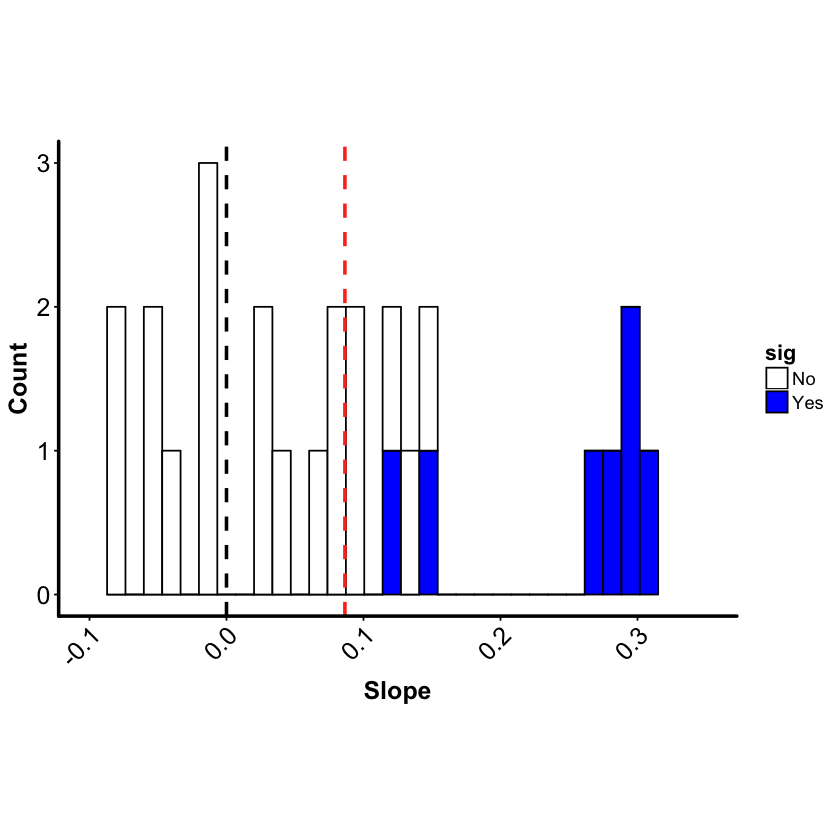

In [11]:
StdSlopes_Observed = rbind(Johnson_lmSummary_filtered, Thompson_lmSummary_filtered)

# Histogram of slopes for 'Cyan' with no migration
HistSlopes_Observed <- ggplot(StdSlopes_Observed, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = StdSlopes_Observed, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.1, 0.35)) + scale_x_continuous(breaks = seq(from = -0.1, to = 0.30, by = 0.1)) +
    ng1.45
HistSlopes_Observed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


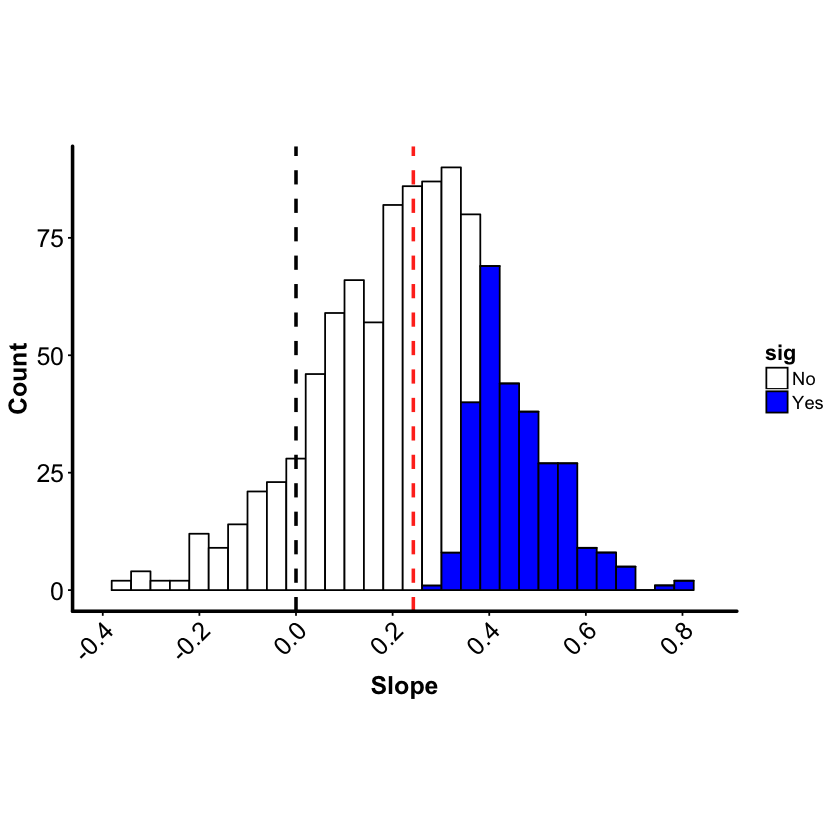

In [12]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin10_NoMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin10_NoMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin10_NoMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.4, 0.85)) + scale_x_continuous(breaks = seq(from = -0.4, to = 0.8, by = 0.2)) +
    ng1.45 
Santangelo_HistSlopes_Kmin10_NoMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


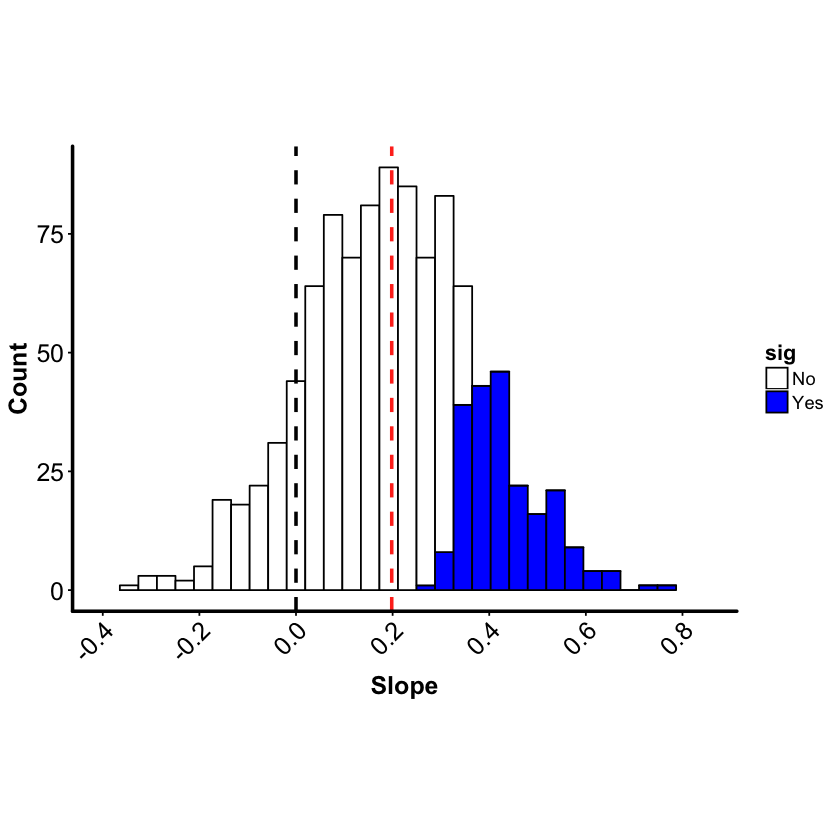

In [13]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin100_NoMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin100_NoMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin100_NoMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.4, 0.85)) + scale_x_continuous(breaks = seq(from = -0.4, to = 0.8, by = 0.2)) +
    ng1.45 
Santangelo_HistSlopes_Kmin100_NoMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


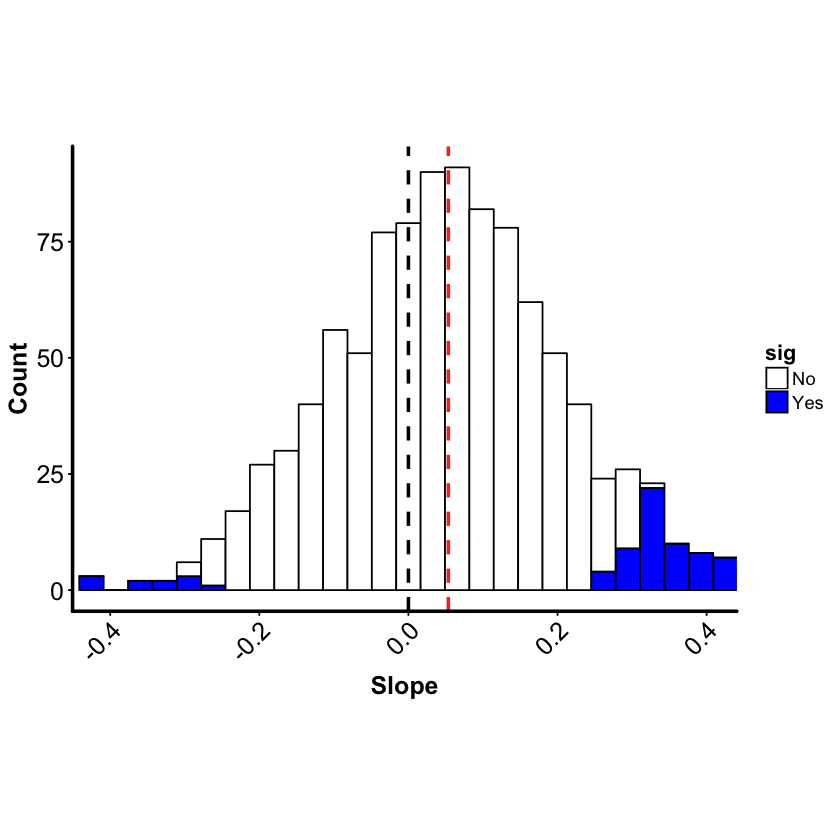

In [8]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin500_NoMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin500_NoMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin500_NoMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.41, 0.4)) + scale_x_continuous(breaks = seq(from = -0.4, to = 0.4, by = 0.2)) +
    ng1.45 
Santangelo_HistSlopes_Kmin500_NoMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


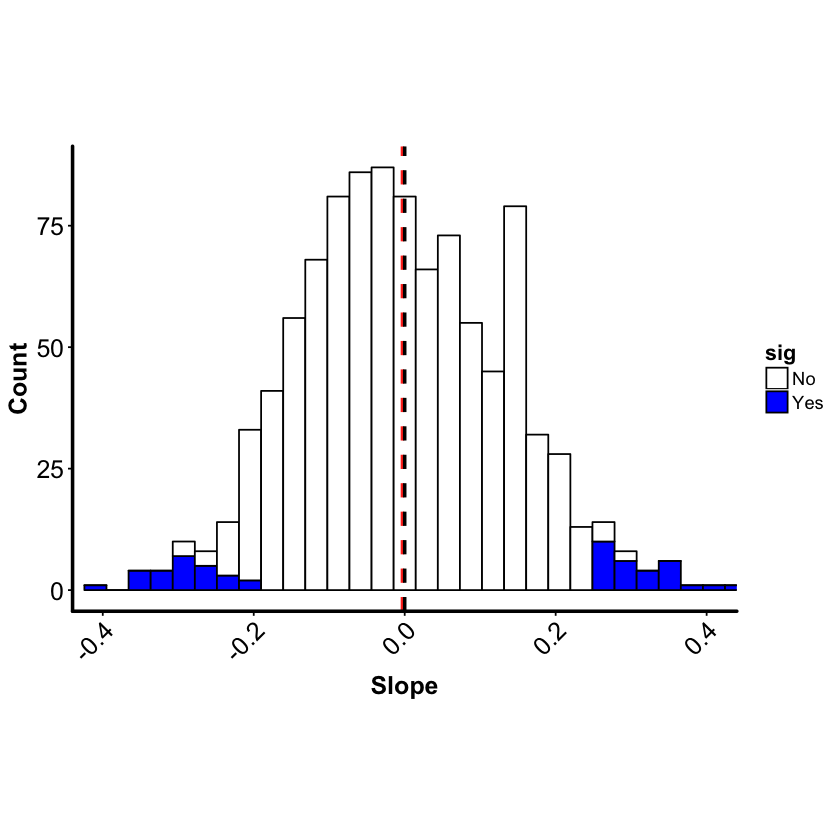

In [14]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin1000_NoMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin1000_NoMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin1000_NoMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.4, 0.4)) + scale_x_continuous(breaks = seq(from = -0.4, to = 0.4, by = 0.2)) +
    ng1.45 
Santangelo_HistSlopes_Kmin1000_NoMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


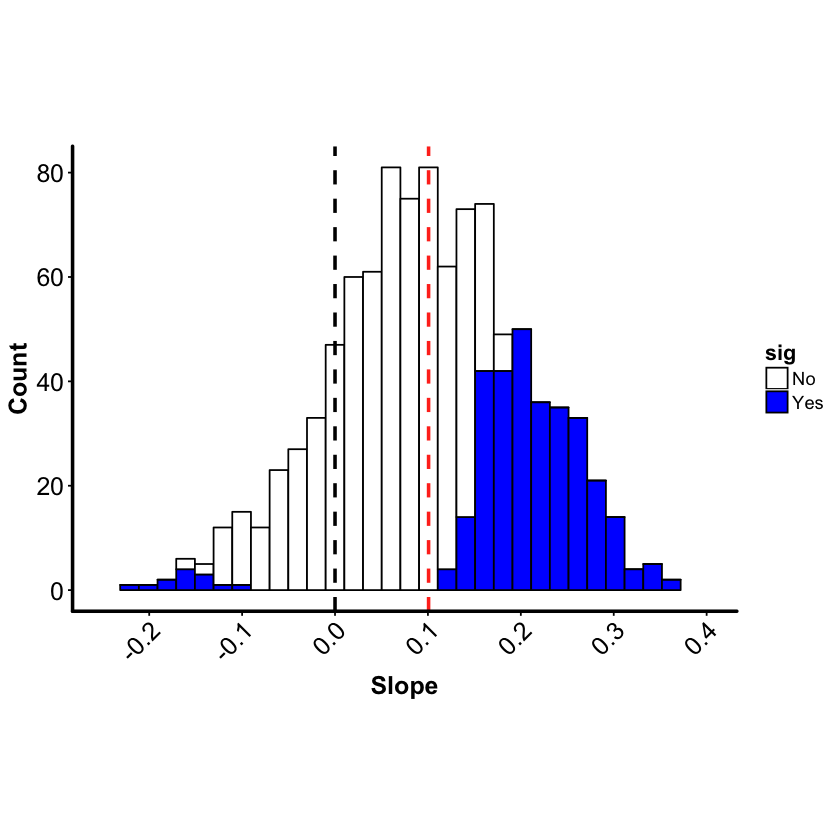

In [15]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin10_HighMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin10_HighMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin10_HighMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.25, 0.4)) + scale_x_continuous(breaks = seq(from = -0.2, to = 0.4, by = 0.1)) +
    ng1.45 
Santangelo_HistSlopes_Kmin10_HighMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


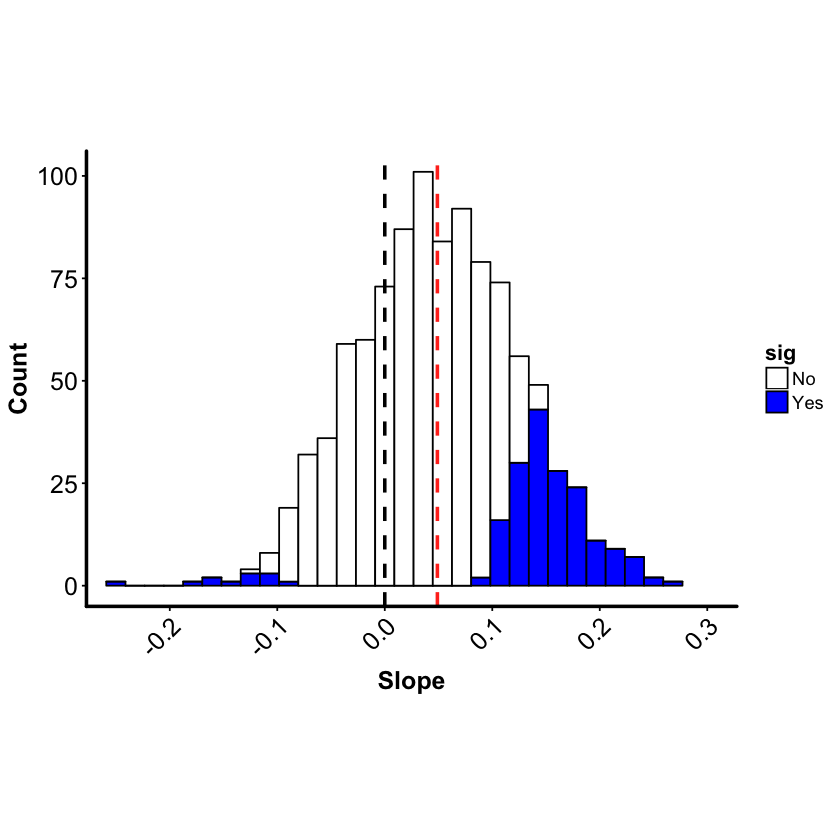

In [16]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin100_HighMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin100_HighMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin100_HighMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.25, 0.3)) + scale_x_continuous(breaks = seq(from = -0.2, to = 0.3, by = 0.1)) +
    ng1.45 
Santangelo_HistSlopes_Kmin100_HighMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


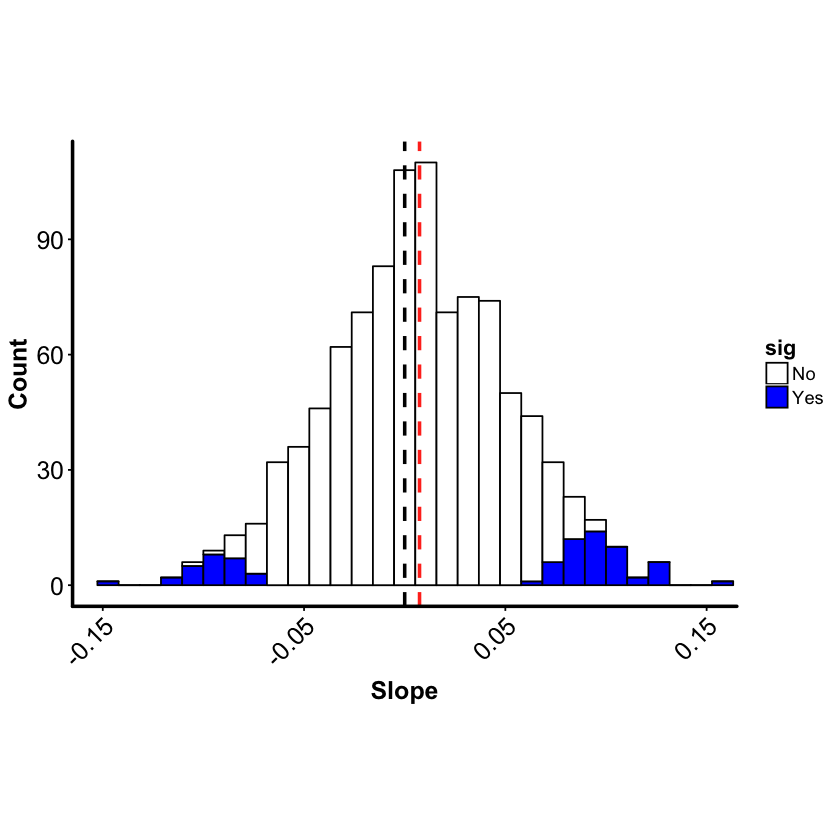

In [9]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin500_HighMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin500_HighMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin500_HighMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.15, 0.15)) + scale_x_continuous(breaks = seq(from = -0.15, to = 0.15, by = 0.1)) +
    ng1.45 
Santangelo_HistSlopes_Kmin500_HighMig

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


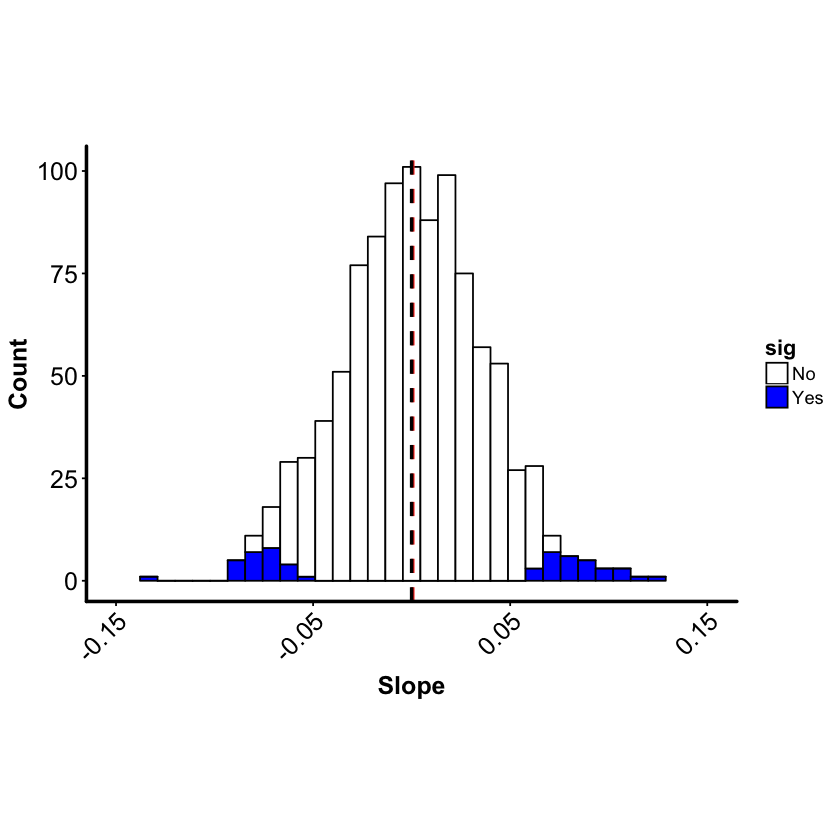

In [32]:
# Histogram of slopes for 'Cyan' with no migration
Santangelo_HistSlopes_Kmin1000_HighMig <- ggplot(Santangelo_et_al_data_Gen250_Kmin1000_HighMig, aes(x = estimate, fill = sig)) +
    ylab("Count") + xlab("Slope") + 
    geom_histogram(color = "black") +
    geom_vline(data = Santangelo_et_al_data_Gen250_Kmin1000_HighMig, aes(xintercept = mean(estimate)), size = 1, colour = "#FF3721", linetype = "dashed") +
    geom_vline(xintercept = 0, size = 1, colour = "black", linetype = "dashed") +
    scale_fill_manual(labels = c("No", "Yes"), values=c("white", "blue")) + 
    coord_cartesian(xlim = c(-0.15, 0.15)) + scale_x_continuous(breaks = seq(from = -0.15, to = 0.15, by = 0.1)) +
    ng1.45 
Santangelo_HistSlopes_Kmin1000_HighMig

In [10]:
range(StdSlopes_Observed$estimate)

[1] -0.0842195  0.3045993

In [19]:
range(Santangelo_et_al_data_Gen250_Kmin100_HighMig$estimate)

[1] -0.2495963  0.2685732

In [17]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/figures"

HistSlopes_Observed_NoLeg <- HistSlopes_Observed + theme(legend.position="none")
Santangelo_HistSlopes_Kmin10_NoMig_NoLeg <- Santangelo_HistSlopes_Kmin10_NoMig + theme(legend.position="none")
Santangelo_HistSlopes_Kmin100_NoMig_NoLeg <- Santangelo_HistSlopes_Kmin100_NoMig + theme(legend.position="none")
Santangelo_HistSlopes_Kmin10_HighMig_NoLeg <- Santangelo_HistSlopes_Kmin10_HighMig + theme(legend.position="none")
Santangelo_HistSlopes_Kmin100_HighMig_NoLeg <- Santangelo_HistSlopes_Kmin100_HighMig + theme(legend.position="none")

ggsave("Figure-S11E_HistSlopes_Observed_NoLeg.pdf", plot = HistSlopes_Observed_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S11A_Santangelo_HistSlopes_Kmin10_NoMig_NoLeg.pdf", plot = Santangelo_HistSlopes_Kmin10_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S11B_Santangelo_HistSlopes_Kmin100_NoMig_NoLeg.pdf", plot = Santangelo_HistSlopes_Kmin100_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S11C_Santangelo_HistSlopes_Kmin10_HighMig_NoLeg.pdf", plot = Santangelo_HistSlopes_Kmin10_HighMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S11D_Santangelo_HistSlopes_Kmin100_HighMig_NoLeg.pdf", plot = Santangelo_HistSlopes_Kmin100_HighMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)11

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
